In [366]:
import matplotlib.pyplot as plt
import scipy.stats as st
import matplotlib as mpl
import seaborn as sb
import pandas as pd
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from scipy.integrate import quad
from scipy.interpolate import interp1d

from matplotlib import animation, rc
from IPython.display import HTML
%matplotlib inline
sb.set()

In [776]:
H0     = 0.67

Ocb    = 0.3
Ok     = 0.0
Omrad  = 0.0001
zvals  = np.linspace(0, 2.5, 30)

In [777]:
def hub(z, Ocb=0.32):
    #H**2/H0**2
    return Omrad*(1+z)**4 + Ocb*(1+z)**3 +  Ok*(1+z)**2 + (1 - Ocb - Ok - Omrad)

No handles with labels found to put in legend.


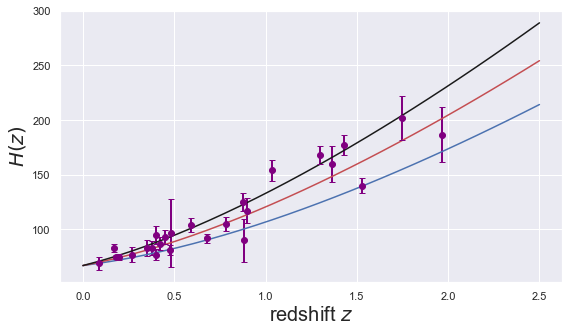

In [778]:
fig = plt.figure(figsize=(9,5))
ax1 = fig.add_subplot(111)
plt.plot(zvals, [100*H0*hub(z, 0.22)**0.5 for z in zvals], 'b-')
plt.plot(zvals, [100*H0*hub(z, 0.32)**0.5 for z in zvals], 'r-')
plt.plot(zvals, [100*H0*hub(z, 0.42)**0.5 for z in zvals], 'k-')


dataHz = np.loadtxt('Hz_all.dat')
redshifts, obs, errors = [dataHz[:,i] for i in [0,1,2]]
ax1.errorbar(redshifts, obs, errors/2., xerr=None,
    color='purple', marker='o', ls='None',
    elinewidth =2, capsize=3, capthick = 1)
ax1.legend(loc='lower right', frameon=False)
plt.ylabel('$H(z)$', fontsize=20)
plt.xlabel('redshift $z$', fontsize=20)
plt.show()

# CPL

$w(z) = w_0 + w_a\frac{z}{(1+z)}$

$\frac{H^2}{H_0^2} = \Omega_m (1+z)^3 + (1 - \Omega_m)e^{\frac{-3w_a z}{1+z}}(1 + z)^{3(1 + w_0+w_a)}$

In [779]:
def rhow(z, w0, wa):
    return np.exp(-3*wa*z/(1+z))*(1+z)**(3*(1+w0+wa))

In [780]:
def hub_cpl(z, w0, wa):
    return Omrad*(1+z)**4 + Ocb*(1+z)**3 +  Ok*(1+z)**2 + (1 - Ocb - Ok - Omrad)*rhow(z, w0, wa)

No handles with labels found to put in legend.


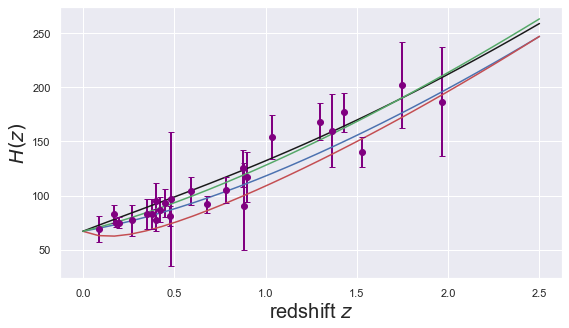

In [781]:
fig = plt.figure(figsize=(9,5))
ax1 = fig.add_subplot(111)
plt.plot(zvals, [100*H0*hub_cpl(z, w0=-1, wa =0)**0.5 for z in zvals], 'b-')
plt.plot(zvals, [100*H0*hub_cpl(z, -2.5, 3.5)**0.5 for z in zvals], 'r-')
plt.plot(zvals, [100*H0*hub_cpl(z, -0.5, -0.5)**0.5 for z in zvals], 'k-')

plt.plot(zvals, [100*H0*hub_cpl(z, -.85, 0.45)**0.5 for z in zvals], 'g-')

dataHz = np.loadtxt('Hz_all.dat')
redshifts, obs, errors = [dataHz[:,i] for i in [0,1,2]]
ax1.errorbar(redshifts, obs, errors, xerr=None,
    color='purple', marker='o', ls='None',
    elinewidth =2, capsize=3, capthick = 1)
ax1.legend(loc='lower right', frameon=False)
plt.ylabel('$H(z)$', fontsize=20)
plt.xlabel('redshift $z$', fontsize=20)
plt.show()

# numerico 

In [782]:
def w_ee(z, w0, wa):
    return  w0 + wa*np.log(z)**2*np.cos(z)   #w0 + wa*z/(1+z)

In [783]:
def integ(z, w0, wa):
    return 3*(1+w_ee(z, w0, wa))/(1+z)

In [784]:
#quad(integ, 0, 2, args=( -.5, 0.1))[0]

In [785]:
rhow_num = [quad(integ, 0, zi, args=( -1.5, 0.1))[0] for zi in zvals]

/var/folders/vz/q5r2932x0kl2_jxnzqr_3jlr0000gn/T/ipykernel_15328/3493422656.py:2: RuntimeWarning: divide by zero encountered in log
  return  w0 + wa*np.log(z)**2*np.cos(z)   #w0 + wa*z/(1+z)
/var/folders/vz/q5r2932x0kl2_jxnzqr_3jlr0000gn/T/ipykernel_15328/1184607111.py:1: IntegrationWarning: Extremely bad integrand behavior occurs at some points of the
  integration interval.
  rhow_num = [quad(integ, 0, zi, args=( -1.5, 0.1))[0] for zi in zvals]


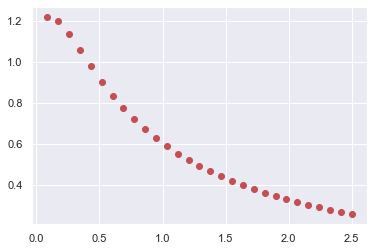

In [786]:
plt.plot(zvals, np.exp(rhow_num), 'ro')
#plt.plot(zvals , rhow(zvals, -1.5, 0.1))


In [787]:
def hub_generica(z, w0, wa):
    return Omrad*(1+z)**4 + Ocb*(1+z)**3 +  Ok*(1+z)**2 + (1 - Ocb - Ok - Omrad)*np.exp(rhow_num) #interpolacion

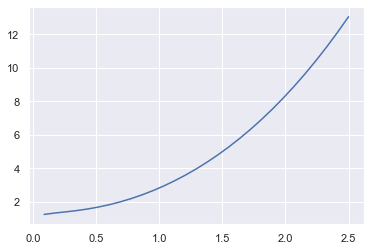

In [788]:
plt.plot(zvals, hub_generica(zvals, -1.5, 0.1))

# Chisq

In [789]:
s= 1./errors**2
covariance = np.diag(s)

In [790]:
def loglike_hd_cpl(w0=-1, wa= 0.):
    theory = 100*H0*hub_cpl(redshifts, w0, wa)**0.5
    delta = theory -  obs
    chisquare=np.dot(delta,np.dot(np.linalg.inv(covariance),delta))
    return -chisquare/2

In [791]:
w0 = np.linspace(-2., -0.5)
probable  = [loglike_hd_cpl(i, wa=0) for i in w0]

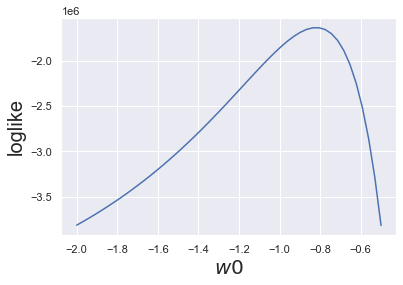

In [792]:
plt.plot(w0, probable)
plt.ylabel('loglike',fontsize=20)
plt.xlabel('$w0$',  fontsize=20)
plt.show()

In [793]:
wa = np.linspace(-.5, 1.)
probable  = [loglike_cpl(-1, i) for i in wa]

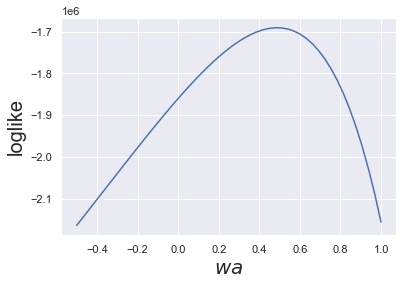

In [794]:
plt.plot(wa, probable)
plt.ylabel('loglike',fontsize=20)
plt.xlabel('$wa$',  fontsize=20)
plt.show()

In [795]:
#plt.plot(zvals, [100*H0*hub_cpl(z, -.85, 0.45)**0.5 for z in zvals], 'g-')

# Fake data

In [796]:
fake_data = 100*H0*hub_cpl(redshifts, w0=-1, wa=0)**0.5

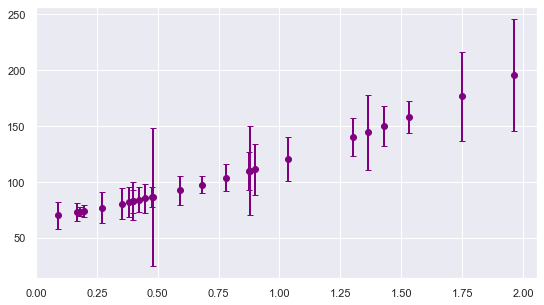

In [797]:
fig = plt.figure(figsize=(9,5))
ax1 = fig.add_subplot(111)
ax1.errorbar(redshifts, fake_data, errors, xerr=None,
    color='purple', marker='o', ls='None',
    elinewidth =2, capsize=3, capthick = 1)
plt.show()

In [798]:
def loglike_hd_cpl_fake(w0=-1, wa= 0.):
    delta = 100*H0*hub_cpl(redshifts, w0, wa)**0.5 -  fake_data
    chisquare=np.dot(delta,np.dot(np.linalg.inv(covariance),delta))
    return -chisquare/2

In [799]:
w0 = np.linspace(-1.5, -0.5)
probable  = [loglike_hd_cpl_fake(i, wa=0) for i in w0]

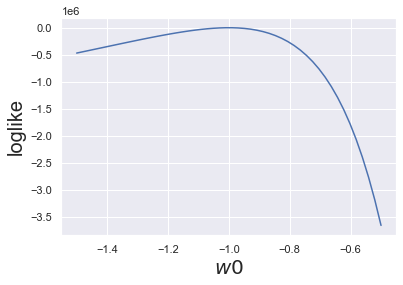

In [800]:
plt.plot(w0, probable)
plt.ylabel('loglike',fontsize=20)
plt.xlabel('$w0$',  fontsize=20)
plt.show()

In [801]:
wa = np.linspace(-.5, .5)
probable  = [loglike_hd_cpl_fake(-1, i) for i in wa]

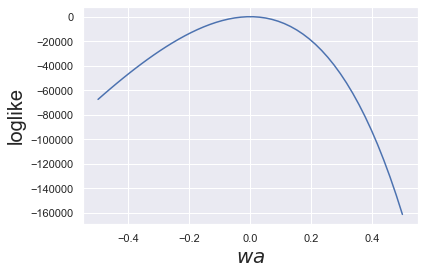

In [802]:
plt.plot(wa, probable)
plt.ylabel('loglike',fontsize=20)
plt.xlabel('$wa$',  fontsize=20)
plt.show()

/var/folders/vz/q5r2932x0kl2_jxnzqr_3jlr0000gn/T/ipykernel_15328/3105527943.py:12: UserWarning: No contour levels were found within the data range.
  CS = ax.contour(x, y, grid, np.arange(-30., -10, 2))


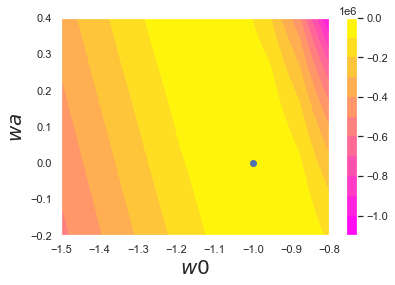

In [803]:
from matplotlib import ticker, cm

x = np.linspace(-1.5, -0.8, 10)
y = np.linspace(-.2, .4, 10)

grid = [list(map(lambda p: loglike_hd_cpl_fake(p, wa=i), x)) for i in y]

fig, ax = plt.subplots()
gs = ax.contourf(x, y, grid, 10, cmap='spring')
cbar = fig.colorbar(gs)

CS = ax.contour(x, y, grid, np.arange(-30., -10, 2))
ax.clabel(CS, inline=10, fontsize=10)
plt.scatter(-1, 0)
plt.ylabel('$wa$',fontsize=20)
plt.xlabel('$w0$',  fontsize=20)
plt.show()

No handles with labels found to put in legend.


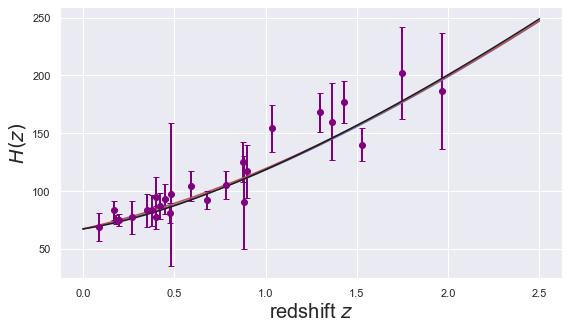

In [804]:
fig = plt.figure(figsize=(9,5))
ax1 = fig.add_subplot(111)
plt.plot(zvals, [100*H0*hub_cpl(z, -1, 0)**0.5 for z in zvals], 'b-')
plt.plot(zvals, [100*H0*hub_cpl(z, -0.9, -0.2)**0.5 for z in zvals], 'r-')
plt.plot(zvals, [100*H0*hub_cpl(z, -1.1, 0.4)**0.5 for z in zvals], 'k-')

dataHz = np.loadtxt('Hz_all.dat')
redshifts, obs, errors = [dataHz[:,i] for i in [0,1,2]]
ax1.errorbar(redshifts, obs, errors, xerr=None,
    color='purple', marker='o', ls='None',
    elinewidth =2, capsize=3, capthick = 1)
ax1.legend(loc='lower right', frameon=False)
plt.ylabel('$H(z)$', fontsize=20)
plt.xlabel('redshift $z$', fontsize=20)
plt.show()

![title](images.png)

In [805]:
from scipy.optimize import minimize

In [806]:
def loglike_hd_cpl_fake(wi):
    delta = 100*H0*hub_cpl(redshifts, wi[0], wi[1])**0.5 -  fake_data
    chisquare=np.dot(delta,np.dot(np.linalg.inv(covariance),delta))
    return -chisquare/2

In [807]:
minimize(loglike_hd_cpl_fake, (-1, 0), method='Powell')

/var/folders/vz/q5r2932x0kl2_jxnzqr_3jlr0000gn/T/ipykernel_15328/464559217.py:2: RuntimeWarning: overflow encountered in power
  return np.exp(-3*wa*z/(1+z))*(1+z)**(3*(1+w0+wa))


   direc: array([[1., 0.],
       [0., 1.]])
     fun: nan
 message: 'NaN result encountered.'
    nfev: 58
     nit: 2
  status: 3
 success: False
       x: array([318.24795272,   5.17585792])

In [127]:
#%cat sn_z_mu_dmu_union2.txt

# SN - Union 2.1

In [631]:
names = ['name', 'z', 'mu', 'error']
result = pd.read_table('sn_z_mu_dmu_union2.txt', sep='\s+', names=names, index_col='z')
result=result.sort_index()

Text(0, 0.5, '$\\mu$')

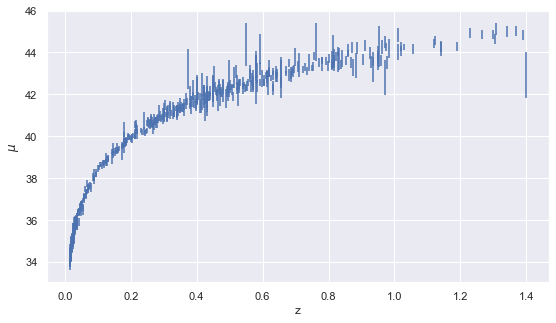

In [632]:
plt.figure(figsize=(9,5))
result['mu'].plot(yerr=result['error'], linestyle='None')
plt.ylabel(r'$\mu$') 

In [633]:
def hubble_inv(x, w0, wa):
    return H0/hub_cpl(x, w0, wa)

In [634]:
# testing
quad(hubble_inv, 0., 2.5, args=(-1.2, 0.2))[0]

0.6032414832478802

In [635]:
zvals= np.linspace(0.05, 1.5, 557)

In [636]:
def mu(w0, wa):
    xi = np.array([quad(hubble_inv, 0.01, i, args=(w0, wa))[0] for i in zvals])
    dl = (1+zvals)*xi
    mu2 = 5*np.log10(dl*0.1)+49.4
    return mu2

Text(0, 0.5, '$\\mu$')

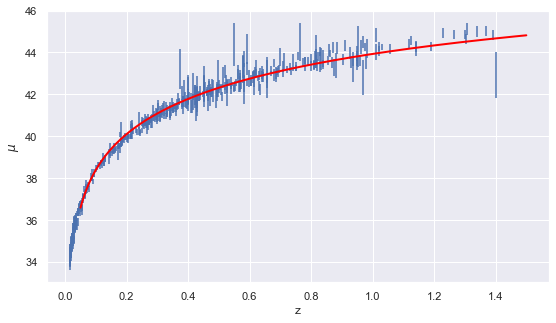

In [637]:
plt.figure(figsize=(9,5))
result['mu'].plot(yerr=result['error'], linestyle='None')
plt.plot(zvals, mu(-1, 0.), color='red', lw=2)
plt.ylabel(r'$\mu$') 

# Fake data

In [638]:
mu_fake = mu(-1, 0)*1.0

In [639]:
cov =np.diag(result['error'])

In [640]:
def loglike_sn_cpl_fake(w0, wa):
    delta = mu(w0, wa) -  mu_fake
    #print(delta)
    chisquare=np.dot(delta,np.dot(np.linalg.inv(cov),delta))
    return -chisquare/2

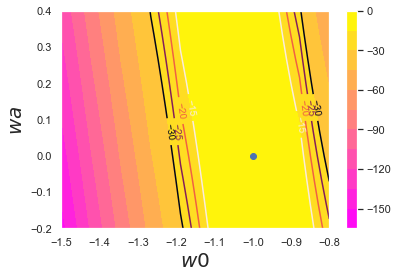

In [641]:
from matplotlib import ticker, cm

x = np.linspace(-1.5, -0.8, 10)
y = np.linspace(-.2, .4, 10)

grid = [list(map(lambda p: loglike_sn_cpl_fake(p, wa=i), x)) for i in y]

fig, ax = plt.subplots()
gs = ax.contourf(x, y, grid, 10, cmap='spring')
cbar = fig.colorbar(gs)

CS = ax.contour(x, y, grid, np.arange(-30., -10, 5))
ax.clabel(CS, inline=10, fontsize=10)
plt.scatter(-1, 0)
plt.ylabel('$wa$',fontsize=20)
plt.xlabel('$w0$',  fontsize=20)
plt.show()

# Better work with  bins

https://github.com/ja-vazquez/SimpleMC/tree/master/simplemc/data

In [64]:
#names = ['z', 'mu']
#result = pd.read_table('jla_binned_distances_31nodes_v1.txt', sep='\s+', names=names, index_col='z', skiprows=3)


In [70]:
#cov = pd.read_table('cov_jla_binned_distances_31nodes_v1.txt', skiprows=1, sep='\s+', header=None)

# Om - w0

In [642]:
H0     = 0.67

Ocb    = 0.3
Ok     = 0.0
Omrad  = 0.0001
zvals  = np.linspace(0.1, 2.5, 30)

In [643]:
def hubble_cpl(z, Ocb, w0, wa=0, h0=0.67):
    return 100*h0*np.sqrt( Omrad*(1+z)**4 + Ocb*(1+z)**3 +  Ok*(1+z)**2 + (1 - Ocb - Ok - Omrad)*rhow(z, w0, wa))

In [644]:
s= 1./errors**2
covariance = np.diag(s)

In [706]:
def loglike_hd_cpl(Ocb, w0):
    theory = hubble_cpl(redshifts, Ocb, w0)
    delta = theory -  obs
    chisquare=np.dot(delta,np.dot(np.linalg.inv(covariance),delta))
    return -chisquare/2

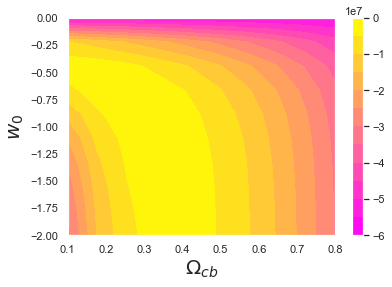

In [692]:
from matplotlib import ticker, cm

x = np.linspace(0.1, 0.8, 10)
y = np.linspace(-2., -0., 10)

grid = [list(map(lambda p: loglike_hd_cpl(p, w0=i), x)) for i in y]

fig, ax = plt.subplots()
gs = ax.contourf(x, y, grid, 10, cmap='spring')
cbar = fig.colorbar(gs)

#CS = ax.contour(x, y, grid, np.arange(-30., -10, 2))
#ax.clabel(CS, inline=10, fontsize=10)
#plt.scatter(-1, 0)
plt.ylabel('$w_0$',fontsize=20)
plt.xlabel('$\Omega_{cb}$',  fontsize=20)
plt.show()

In [708]:
def loglike_hd_cpl2(x):
    theory = hubble_cpl(redshifts, x[0], x[1])
    delta = theory -  obs
    chisquare=np.dot(delta,np.dot(np.linalg.inv(covariance),delta))
    return -chisquare/2

In [709]:
minimize(loglike_hd_cpl2, (0.4, -1)) #, method='Powell')

/var/folders/vz/q5r2932x0kl2_jxnzqr_3jlr0000gn/T/ipykernel_15328/3284355966.py:2: RuntimeWarning: invalid value encountered in sqrt
  return 100*h0*np.sqrt( Omrad*(1+z)**4 + Ocb*(1+z)**3 +  Ok*(1+z)**2 + (1 - Ocb - Ok - Omrad)*rhow(z, w0, wa))
/var/folders/vz/q5r2932x0kl2_jxnzqr_3jlr0000gn/T/ipykernel_15328/464559217.py:2: RuntimeWarning: overflow encountered in power
  return np.exp(-3*wa*z/(1+z))*(1+z)**(3*(1+w0+wa))
/var/folders/vz/q5r2932x0kl2_jxnzqr_3jlr0000gn/T/ipykernel_15328/3284355966.py:2: RuntimeWarning: overflow encountered in multiply
  return 100*h0*np.sqrt( Omrad*(1+z)**4 + Ocb*(1+z)**3 +  Ok*(1+z)**2 + (1 - Ocb - Ok - Omrad)*rhow(z, w0, wa))
/var/folders/vz/q5r2932x0kl2_jxnzqr_3jlr0000gn/T/ipykernel_15328/3284355966.py:2: RuntimeWarning: invalid value encountered in sqrt
  return 100*h0*np.sqrt( Omrad*(1+z)**4 + Ocb*(1+z)**3 +  Ok*(1+z)**2 + (1 - Ocb - Ok - Omrad)*rhow(z, w0, wa))
/var/folders/vz/q5r2932x0kl2_jxnzqr_3jlr0000gn/T/ipykernel_15328/464559217.py:2: RuntimeWa

      fun: nan
 hess_inv: array([[198969.91460987,  17798.677698  ],
       [ 17798.677698  ,   1592.16496835]])
      jac: array([nan, nan])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 651
      nit: 2
     njev: 217
   status: 2
  success: False
        x: array([71391.86587608,  6385.27581027])

# GA 

In [725]:
poblacion = Poblacion(
                n_individuos = 50,
                n_variables  = 2,
                limites_inf  = [0.1,-2.0],
                limites_sup  = [1,0],
                verbose      = False
            )

poblacion.optimizar(
    funcion_objetivo   = loglike_hd_cpl,
#    optimizacion       = "minimizar",
    optimizacion       = "maximizar",    
    n_generaciones     = 150,
    metodo_seleccion   = "tournament",
    elitismo           = 0.01,
    prob_mut           = 0.2,
    distribucion       = "uniforme",
    media_distribucion = 1,
    sd_distribucion    = 1,
    min_distribucion   = -1,
    max_distribucion   = 1,
    parada_temprana    = True,
    rondas_parada      = 10,
    tolerancia_parada  = 10**-10,
    verbose            = False
)

Algoritmo detenido en la generación 39 por falta cambio absoluto mínimo de 1e-10 durante 10 generaciones consecutivas.
-------------------------------------------
Optimización finalizada 2022-05-01 20:37:45
-------------------------------------------
Duración optimización: 0.6227998733520508
Número de generaciones: 39
Valor óptimo de las variables: [0.30411960623698203 -0.8427040886564794]
Valor función objetivo: -1643482.8415506182



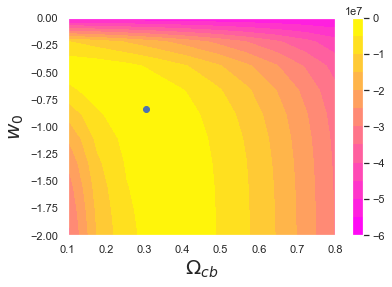

In [726]:
from matplotlib import ticker, cm

x = np.linspace(0.1, 0.8, 10)
y = np.linspace(-2., -0., 10)

grid = [list(map(lambda p: loglike_hd_cpl(p, w0=i), x)) for i in y]

fig, ax = plt.subplots()
gs = ax.contourf(x, y, grid, 10, cmap='spring')
cbar = fig.colorbar(gs)

plt.scatter(0.304, -0.842)
plt.ylabel('$w_0$',fontsize=20)
plt.xlabel('$\Omega_{cb}$',  fontsize=20)
plt.show()

In [755]:
import numdifftools as nd
import scipy.linalg as la
import scipy as sp

In [836]:
hess = nd.Hessian(loglike_hd_cpl_fake, step=0.2)

In [837]:
hess([-1, 0])

array([[-13457747.92408221,  -3413351.85333716],
       [ -3413351.85333716,   -876981.5782791 ]])

In [852]:
eigvl, eigvc = la.eig(hess([-1, 0]))

In [868]:
cov = la.inv(hess([-1, 0]))
cov

array([[-5.79914014e-06,  2.25711762e-05],
       [ 2.25711762e-05, -8.89908844e-05]])

In [874]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111)
plot_elipses(hess([-1, 0]), cov, 0, 1, ax=ax)
plt.show()

-- vals, vecs --  [-6.98120627e-08 -9.47202124e-05] [[-0.96926185 -0.24603145]
 [-0.24603145  0.96926185]]
Ellipse(xy=([-13457747.92408221  -3413351.85333716], [-3413351.85333716  -876981.5782791 ]), width=0.0008014181035087809j, height=0.029519924701831783j, angle=-165.7572028590212)
Ellipse(xy=([-13457747.92408221  -3413351.85333716], [-3413351.85333716  -876981.5782791 ]), width=0.0013136796372723708j, height=0.048388879418650645j, angle=-165.7572028590212)


/var/folders/vz/q5r2932x0kl2_jxnzqr_3jlr0000gn/T/ipykernel_15328/6489760.py:26: RuntimeWarning: invalid value encountered in sqrt
  vec[0]*=np.sqrt(6.18*np.real(vals[0]))
/var/folders/vz/q5r2932x0kl2_jxnzqr_3jlr0000gn/T/ipykernel_15328/6489760.py:27: RuntimeWarning: invalid value encountered in sqrt
  vec[1]*=np.sqrt(6.18*np.real(vals[1]))
/var/folders/vz/q5r2932x0kl2_jxnzqr_3jlr0000gn/T/ipykernel_15328/6489760.py:36: DeprecationWarning: scipy.degrees is deprecated and will be removed in SciPy 2.0.0, use numpy.degrees instead
  theta = sp.degrees(np.arctan2(*vecs[:,0][::-1]))
/var/folders/vz/q5r2932x0kl2_jxnzqr_3jlr0000gn/T/ipykernel_15328/6489760.py:39: DeprecationWarning: scipy.sqrt is deprecated and will be removed in SciPy 2.0.0, use numpy.lib.scimath.sqrt instead
  w, h = 2*sp.sqrt(vals)*sp.sqrt(sigs)
/Users/vetovazquez/opt/anaconda3/lib/python3.9/site-packages/matplotlib/transforms.py:2031: ComplexWarning: Casting complex values to real discards the imaginary part
  self._mtx[0, 

ValueError: setting an array element with a sequence.

<Figure size 432x432 with 1 Axes>

![title](The-effect-of-scalable-constant-r-on-the-eigenvalues-of-hyper-ellipsoidal-shape-The.png)

In [843]:
from matplotlib.patches import Ellipse

In [873]:
def plot_elipses(best, cov, par1, par2, par1_Ltx='name_1', par2_Ltx='name_2', ax=None, contour_col='g',
                 axis_sty='-r', lw=4, label='Fisher', addtxt=None):
            #fig = plt.figure(figsize=(6,6))
            #ax = fig.add_subplot(111) #, aspect='equal')

            #sigmas
            sigmas = [2.3, 6.18] #, 11.83]
            
            #par1, par2 index of the cov matrix
            covslice = cov[[par1,par2], :][:, [par1,par2]]
            mn  = best
            ax  = ax

            def eigsorted(cov):
                vals, vecs = sp.linalg.eigh(cov)
                order = vals.argsort()[::-1]
                return vals[order], vecs[:,order]

            vals, vecs = eigsorted(covslice)
            print('-- vals, vecs -- ', vals, vecs)
            vec = vecs.T.copy()

            #plot vectors
            #vec[0]*=sp.sqrt(6.18*sp.real(vals[0]))
            #vec[1]*=sp.sqrt(6.18*sp.real(vals[1]))
            vec[0]*=np.sqrt(6.18*np.real(vals[0]))
            vec[1]*=np.sqrt(6.18*np.real(vals[1]))
            
            maxdot = '{}o'.format(contour_col)
            plt.plot(mn[par1], mn[par2],maxdot) #, label=self.model)
            plt.plot([mn[par1]-vec[0][0], mn[par1]+vec[0][0]],
                [mn[par2]-vec[0][1],mn[par2]+vec[0][1]], axis_sty)
            plt.plot([mn[par1]-vec[1][0],mn[par1]+vec[1][0]],
                [mn[par2]-vec[1][1],mn[par2]+vec[1][1]],axis_sty)

            theta = sp.degrees(np.arctan2(*vecs[:,0][::-1]))

            for i, sigs in enumerate(sigmas):
                w, h = 2*sp.sqrt(vals)*sp.sqrt(sigs)
                ell = Ellipse(xy=(mn[par1], mn[par2]),  width = w, height = h,\
                              angle=theta, color=contour_col,  lw=lw)
                ell.set_facecolor('none')
                ax.add_artist(ell)
                print(ell)

            #if addtxt:
            #    ax.text(addtxt[0], addtxt[1], addtxt[2], color=contour_col, style='italic')
            #else:
            #    pass
                #ax.legend([ell], [label])
            #ax.set_xlabel('$%s$'%par1_Ltx, fontsize=20)
            #ax.set_ylabel('$%s$'%par2_Ltx, fontsize=20)
            #plt.grid()
            #ax.set_xlim([-1.2, -0.6])
            #ax.set_ylim([-1.5, 1.0])
            #plt.savefig('GA_fisher.pdf')
            #plt.legend(loc='best')
            #plt.title('Fisher', fon    tsize=10)
            #plt.show()
            #return ax

In [700]:
import numpy as np
import random
import warnings
import random
import copy
import pandas as pd
import time
import matplotlib
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sb

In [701]:
class Individuo:
    def __init__(self, n_variables, limites_inf=None, limites_sup=None,
                 verbose=False):
        self.n_variables = n_variables
        self.limites_inf = limites_inf
        self.limites_sup = limites_sup
        self.valor_variables = np.repeat(None, n_variables)
        self.fitness = None
        self.valor_funcion = None
        
        if self.limites_inf is not None \
        and not isinstance(self.limites_inf, np.ndarray):
            self.limites_inf = np.array(self.limites_inf)

        if self.limites_sup is not None \
        and not isinstance(self.limites_sup,np.ndarray):
            self.limites_sup = np.array(self.limites_sup)
        
        if self.limites_inf is not None \
        and len(self.limites_inf) != self.n_variables:
            raise Exception(
                "limites_inf debe tener un valor por cada variable. " +
                "Si para alguna variable no se quiere límite, emplear None. " +
                "Ejemplo: limites_inf = [10, None, 5]"
                )
        elif self.limites_sup is not None \
        and len(self.limites_sup) != self.n_variables:
            raise Exception(
                "limites_sup debe tener un valor por cada variable. " +
                "Si para alguna variable no se quiere límite, emplear None. " +
                "Ejemplo: limites_sup = [10, None, 5]"
                )
        elif (self.limites_inf is None) or (self.limites_sup is None):
            warnings.warn(
                "Es altamente recomendable indicar los límites dentro de los " + 
                "cuales debe buscarse la solución de cada variable. " + 
                "Por defecto se emplea [-10^3, 10^3]."
                )
        elif any(np.concatenate((self.limites_inf, self.limites_sup)) == None):
            warnings.warn(
                "Los límites empleados por defecto cuando no se han definido " +
                "son: [-10^3, 10^3]."
            )

        if self.limites_inf is None:
            self.limites_inf = np.repeat(-10**3, self.n_variables)

        if self.limites_sup is None:
             self.limites_sup = np.repeat(+10**3, self.n_variables)
            
        if self.limites_inf is not None:
            self.limites_inf[self.limites_inf == None] = -10**3
           
        if self.limites_sup is not None:
            self.limites_sup[self.limites_sup == None] = +10**3
        
        for i in np.arange(self.n_variables):
            self.valor_variables[i] = random.uniform(
                                        self.limites_inf[i],
                                        self.limites_sup[i]
                                      )

        if verbose:
            print("Nuevo individuo creado")
            print("----------------------")
            print("Valor variables: " + str(self.valor_variables))
            print("Valor función objetivo: " + str(self.valor_funcion))
            print("Fitness: " + str(self.fitness))
            print("Límites inferiores de cada variable: " \
                  + str(self.limites_inf))
            print("Límites superiores de cada variable: " \
                  + str(self.limites_sup))
            print("")

    def __repr__(self):
        """
        Información que se muestra cuando se imprime un objeto individuo.

        """

        texto = "Individuo" \
                + "\n" \
                + "---------" \
                + "\n" \
                + "Valor variables: " + str(self.valor_variables) \
                + "\n" \
                + "Valor función objetivo: " + str(self.valor_funcion) \
                + "\n" \
                + "Fitness: " + str(self.fitness) \
                + "\n" \
                + "Límites inferiores de cada variable: " \
                + str(self.limites_inf) \
                + "\n" \
                + "Límites superiores de cada variable: " \
                + str(self.limites_sup) \
                + "\n"

        return(texto)

    def calcular_fitness(self, funcion_objetivo, optimizacion, verbose = False):
        if not optimizacion in ["maximizar", "minimizar"]:
            raise Exception(
                "El argumento optimizacion debe ser: 'maximizar' o 'minimizar'"
                )

        self.valor_funcion = funcion_objetivo(*self.valor_variables)
        if optimizacion == "maximizar":
            self.fitness = self.valor_funcion
        elif optimizacion == "minimizar":
            self.fitness = -self.valor_funcion

        if verbose:
            print("El individuo ha sido evaluado")
            print("-----------------------------")
            print("Valor función objetivo: " + str(self.valor_funcion))
            print("Fitness: " + str(self.fitness))
            print("")

    def mutar(self, prob_mut=0.01, distribucion="uniforme", media_distribucion=1,
              sd_distribucion=1, min_distribucion=-1, max_distribucion=1,
              verbose=False):
        if not distribucion in ["normal", "uniforme", "aleatoria"]:
            raise Exception(
                "El argumento distribucion debe ser: 'normal', 'uniforme' o " \
                + "'aleatoria'"
                )

        posiciones_mutadas = np.random.uniform(
                                low=0,
                                high=1,
                                size=self.n_variables
                             )
        posiciones_mutadas = posiciones_mutadas < prob_mut

        if distribucion in ["normal", "uniforme"]:
            if distribucion == "normal":
                factor_mut = np.random.normal(
                                loc   = media_distribucion,
                                scale = sd_distribucion,
                                size  = np.sum(posiciones_mutadas)
                             )
            if distribucion == "uniforme":
                factor_mut = np.random.uniform(
                                low  = min_distribucion,
                                high = max_distribucion,
                                size = np.sum(posiciones_mutadas)
                             )
            self.valor_variables[posiciones_mutadas] = \
                self.valor_variables[posiciones_mutadas] + factor_mut

            for i in np.flatnonzero(posiciones_mutadas):
                if self.valor_variables[i] < self.limites_inf[i]:
                    self.valor_variables[i] = self.limites_inf[i]
                if self.valor_variables[i] > self.limites_sup[i]:
                    self.valor_variables[i] = self.limites_sup[i]

        if distribucion == "aleatoria":
            for i in np.flatnonzero(posiciones_mutadas):
                self.valor_variables[i] = random.uniform(
                                            self.limites_inf[i],
                                            self.limites_sup[i]
                                          )

        self.fitness = None
        self.valor_funcion = None

        if verbose:
            print("El individuo ha sido mutado")
            print("---------------------------")
            print("Total mutaciones: " + str(np.sum(posiciones_mutadas)))
            print("Valor variables: " + str(self.valor_variables))
            print("")

In [702]:
class Poblacion:
    def __init__(self, n_individuos, n_variables, limites_inf=None,
                 limites_sup=None, verbose=False):

        self.n_individuos = n_individuos
        self.n_variables = n_variables
        self.limites_inf = limites_inf
        self.limites_sup = limites_sup
        self.individuos = []
        self.optimizado = False
        self.iter_optimizacion = None
        self.mejor_individuo = None
        self.mejor_fitness = None
        self.mejor_valor_funcion = None
        self.mejor_valor_variables = None
        self.historico_individuos = []
        self.historico_mejor_valor_variables = []
        self.historico_mejor_fitness = []
        self.historico_mejor_valor_funcion = []
        self.diferencia_abs = []
        self.resultados_df = None
        self.fitness_optimo = None
        self.valor_variables_optimo = None
        self.valor_funcion_optimo = None

        if self.limites_inf is not None \
        and not isinstance(self.limites_inf,np.ndarray):
            self.limites_inf = np.array(self.limites_inf)

        if self.limites_sup is not None \
        and not isinstance(self.limites_sup,np.ndarray):
            self.limites_sup = np.array(self.limites_sup)

        for i in np.arange(n_individuos):
            individuo_i = Individuo(
                            n_variables = self.n_variables,
                            limites_inf = self.limites_inf,
                            limites_sup = self.limites_sup,
                            verbose     = verbose
                          )
            self.individuos.append(individuo_i)

        if verbose:
            print("----------------")
            print("Población creada")
            print("----------------")
            print("Número de individuos: " + str(self.n_individuos))
            print("Límites inferiores de cada variable: " \
                  + np.array2string(self.limites_inf))
            print("Límites superiores de cada variable: " \
                  + np.array2string(self.limites_sup))
            print("")

    def __repr__(self):
        """
        Información que se muestra cuando se imprime un objeto población.

        """

        texto = "============================" \
                + "\n" \
                + "         Población" \
                + "\n" \
                + "============================" \
                + "\n" \
                + "Número de individuos: " + str(self.n_individuos) \
                + "\n" \
                + "Límites inferiores de cada variable: " + str(self.limites_inf) \
                + "\n" \
                + "Límites superiores de cada variable: " + str(self.limites_sup) \
                + "\n" \
                + "Optimizado: " + str(self.optimizado) \
                + "\n" \
                + "Iteraciones optimización (generaciones): " \
                     + str(self.iter_optimizacion) \
                + "\n" \
                + "\n" \
                + "Información del mejor individuo:" \
                + "\n" \
                + "----------------------------" \
                + "\n" \
                + "Valor variables: " + str(self.mejor_valor_variables) \
                + "\n" \
                + "Fitness: " + str(self.mejor_fitness) \
                + "\n" \
                + "\n" \
                + "Resultados tras optimizar:" \
                + "\n" \
                + "--------------------------" \
                + "\n" \
                + "Valor óptimo de variables: " + str(self.valor_variables_optimo) \
                + "\n" \
                + "Valor óptimo función objetivo: " + str(self.valor_funcion_optimo) \
                + "\n" \
                + "Fitness óptimo: " + str(self.fitness_optimo)
                
                
        return(texto)

    def mostrar_individuos(self, n=None):
        if n is None:
            n = self.n_individuos
        elif n > self.n_individuos:
            n = self.n_individuos

        for i in np.arange(n):
            print(self.individuos[i])
        return(None)

    def evaluar_poblacion(self, funcion_objetivo, optimizacion, verbose=False):
        for i in np.arange(self.n_individuos):
            self.individuos[i].calcular_fitness(
                funcion_objetivo = funcion_objetivo,
                optimizacion     = optimizacion,
                verbose          = verbose
            )

        self.mejor_individuo = copy.deepcopy(self.individuos[0])
        for i in np.arange(self.n_individuos):
            if self.individuos[i].fitness > self.mejor_individuo.fitness:
                self.mejor_individuo = copy.deepcopy(self.individuos[i])

        self.mejor_fitness = self.mejor_individuo.fitness
        self.mejor_valor_variables = self.mejor_individuo.valor_variables
        self.mejor_valor_funcion = self.mejor_individuo.valor_funcion
        
        if verbose:
            print("------------------")
            print("Población evaluada")
            print("------------------")
            print("Mejor fitness encontrado : " + str(self.mejor_fitness))
            print("Valor de la función objetivo: " \
                + str(self.mejor_valor_funcion))
            print("Mejor valor de variables encontrado : "
                + str(self.mejor_valor_variables))
            print("")

    def cruzar_individuos(self, parental_1, parental_2, verbose=False):

        if parental_1 not in np.arange(self.n_individuos):
            raise Exception(
                "El el índice del parental_1 debe de ser un valor entre 0 y " +
                "el número de individuos de la población."
                )
        if parental_2 not in np.arange(self.n_individuos):
            raise Exception(
                "El el índice del parental_2 debe de ser un valor entre 0 y " +
                "el número de individuos de la población."
                )

        parental_1 = self.individuos[parental_1]
        parental_2 = self.individuos[parental_2]
        
        descendencia = copy.deepcopy(parental_1)
        descendencia.valor_variables = np.repeat(None, descendencia.n_variables)
        descendencia.fitness = None

        herencia_parent_1 = np.random.choice(
                                a       = [True, False],
                                size    = descendencia.n_variables,
                                p       = [0.5, 0.5],
                                replace = True
                            )
        herencia_parent_2 = np.logical_not(herencia_parent_1)

        descendencia.valor_variables[herencia_parent_1] \
            = parental_1.valor_variables[herencia_parent_1]

        descendencia.valor_variables[herencia_parent_2] \
            = parental_2.valor_variables[herencia_parent_2]
        

        descendencia = copy.deepcopy(descendencia)

        if verbose:
            print("---------------")
            print("Cruce realizado: descendencia creada")
            print("---------------")
            print("Valor variables: " + str(descendencia.valor_variables))
            print("")
        return(descendencia)
    
    def seleccionar_individuo(self, n, return_indices=True,
                              metodo_seleccion="tournament", verbose=False):

        if metodo_seleccion not in ["ruleta", "rank", "tournament"]:
            raise Exception(
                "El método de selección debe de ser ruleta, rank o tournament"
                )

        array_fitness = np.repeat(None, self.n_individuos)
        for i in np.arange(self.n_individuos):
            array_fitness[i] = copy.copy(self.individuos[i].fitness)
        
        if metodo_seleccion == "ruleta":
            probabilidad_seleccion = array_fitness / np.sum(array_fitness)
            ind_seleccionado = np.random.choice(
                                    a       = np.arange(self.n_individuos),
                                    size    = n,
                                    p       = list(probabilidad_seleccion),
                                    replace = True
                               )
        elif metodo_seleccion == "rank":
            order = np.flip(np.argsort(a=array_fitness) + 1)
            ranks = np.argsort(order) + 1
            probabilidad_seleccion = 1 / ranks
            probabilidad_seleccion = probabilidad_seleccion / np.sum(probabilidad_seleccion)
            ind_seleccionado = np.random.choice(
                                a       = np.arange(self.n_individuos),
                                size    = n,
                                p       = list(probabilidad_seleccion),
                                replace = True
                            )
        elif metodo_seleccion == "tournament":
            ind_seleccionado = np.repeat(None,n)
            for i in np.arange(n):
                # Se seleccionan aleatoriamente dos parejas de individuos.
                candidatos_a = np.random.choice(
                                a       = np.arange(self.n_individuos),
                                size    = 2,
                                replace = False
                            )
                candidatos_b = np.random.choice(
                                a       = np.arange(self.n_individuos),
                                size    = 2,
                                replace = False
                            )
                # De cada pareja se selecciona el de mayor fitness.
                if array_fitness[candidatos_a[0]] > array_fitness[candidatos_a[1]]:
                    ganador_a = candidatos_a[0]
                else:
                    ganador_a = candidatos_a[1]

                if array_fitness[candidatos_b[0]] > array_fitness[candidatos_b[1]]:
                    ganador_b = candidatos_b[0]
                else:
                    ganador_b = candidatos_b[1]

                # Se comparan los dos ganadores de cada pareja.
                if array_fitness[ganador_a] > array_fitness[ganador_b]:
                    ind_final = ganador_a
                else:
                    ind_final = ganador_b
                
                ind_seleccionado[i] = ind_final

        if verbose:
            print("---------------")
            print("Individuo seleccionado")
            print("---------------")
            print("Método selección: " + metodo_seleccion)
            print("")

        if(return_indices):
            return(ind_seleccionado)
        else:
            if n == 1:
                return(copy.deepcopy(self.individuos[int(ind_seleccionado)]))
            if n > 1:
                return(
                    [copy.deepcopy(self.individuos[i]) for i in ind_seleccionado]
                )
            
    def crear_nueva_generecion(self, metodo_seleccion="tournament",
                               elitismo=0.1, prob_mut=0.01,
                               distribucion="uniforme",
                               media_distribucion=1, sd_distribucion=1,
                               min_distribucion=-1, max_distribucion=1,
                               verbose=False, verbose_seleccion=False,
                               verbose_cruce=False, verbose_mutacion=False):

        nuevos_individuos = []

        if elitismo > 0:
            n_elitismo = int(np.ceil(self.n_individuos*elitismo))
            array_fitness = np.repeat(None, self.n_individuos)
            for i in np.arange(self.n_individuos):
                array_fitness[i] = copy.copy(self.individuos[i].fitness)
            rank = np.flip(np.argsort(array_fitness))
            elite = [copy.deepcopy(self.individuos[i]) for i in rank[:n_elitismo]]
            nuevos_individuos = nuevos_individuos + elite
        else:
            n_elitismo = 0
            
        for i in np.arange(self.n_individuos-n_elitismo):
            # Seleccionar parentales
            indice_parentales = self.seleccionar_individuo(
                                    n                = 2,
                                    return_indices   = True,
                                    metodo_seleccion = metodo_seleccion,
                                    verbose          = verbose_seleccion
                                 )
            
            descendencia = self.cruzar_individuos(
                            parental_1 = indice_parentales[0],
                            parental_2 = indice_parentales[1],
                            verbose    = verbose_cruce
                           )
            
            descendencia.mutar(
                prob_mut         = prob_mut,
                distribucion     = distribucion,
                min_distribucion = min_distribucion,
                max_distribucion = max_distribucion,
                verbose          = verbose_mutacion
            )

            nuevos_individuos = nuevos_individuos + [descendencia]

        self.individuos = copy.deepcopy(nuevos_individuos)
        self.mejor_individuo = None
        self.mejor_fitness = None
        self.mejor_valor_variables = None
        self.mejor_valor_funcion = None
        
        if verbose:
            print("-----------------------")
            print("Nueva generación creada")
            print("-----------------------")
            print("Método selección: " + metodo_seleccion)
            print("Elitismo: " + str(elitismo))
            print("Número individuos élite: " + str(n_elitismo))
            print("Número de nuevos individuos: "\
                + str(self.n_individuos-n_elitismo))
            print("")

    def optimizar(self, funcion_objetivo, optimizacion, n_generaciones = 50,
                  metodo_seleccion="tournament", elitismo=0.1, prob_mut=0.01,
                  distribucion="uniforme", media_distribucion=1,
                  sd_distribucion=1, min_distribucion=-1, max_distribucion=1,
                  parada_temprana=False, rondas_parada=None,
                  tolerancia_parada=None,verbose=False,
                  verbose_nueva_generacion=False,
                  verbose_seleccion=False, verbose_cruce=False,
                  verbose_mutacion=False, verbose_evaluacion=False):

        if parada_temprana \
        and (rondas_parada is None or tolerancia_parada is None):
            raise Exception(
                "Para activar la parada temprana es necesario indicar un " \
                + " valor de rondas_parada y de tolerancia_parada."
                )

        start = time.time()

        for i in np.arange(n_generaciones):
            if verbose:
                print("-------------")
                print("Generación: " + str(i))
                print("-------------")
            
            self.evaluar_poblacion(
                funcion_objetivo = funcion_objetivo,
                optimizacion     = optimizacion,
                verbose          = verbose_evaluacion
                )

            self.historico_individuos.append(copy.deepcopy(self.individuos))
            self.historico_mejor_fitness.append(copy.deepcopy(self.mejor_fitness))
            self.historico_mejor_valor_variables.append(
                                    copy.deepcopy(self.mejor_valor_variables)
                                )
            self.historico_mejor_valor_funcion.append(
                                    copy.deepcopy(self.mejor_valor_funcion)
                                )

            if i == 0:
                self.diferencia_abs.append(None)
            else:
                diferencia = abs(self.historico_mejor_fitness[i] \
                                 - self.historico_mejor_fitness[i-1])
                self.diferencia_abs.append(diferencia)

            if parada_temprana and i > rondas_parada:
                ultimos_n = np.array(self.diferencia_abs[-(rondas_parada): ])
                if all(ultimos_n < tolerancia_parada):
                    print("Algoritmo detenido en la generación " 
                          + str(i) \
                          + " por falta cambio absoluto mínimo de " \
                          + str(tolerancia_parada) \
                          + " durante " \
                          + str(rondas_parada) \
                          + " generaciones consecutivas.")
                    break
                   
            self.crear_nueva_generecion(
                metodo_seleccion   = metodo_seleccion,
                elitismo           = elitismo,
                prob_mut           = prob_mut,
                distribucion       = distribucion,
                verbose            = verbose_nueva_generacion,
                verbose_seleccion  = verbose_seleccion,
                verbose_cruce      = verbose_cruce,
                verbose_mutacion   = verbose_mutacion
                )

        end = time.time()
        self.optimizado = True
        self.iter_optimizacion = i
        
        indice_valor_optimo  = np.argmax(np.array(self.historico_mejor_fitness))
        self.fitness_optimo  = self.historico_mejor_fitness[indice_valor_optimo]
        self.valor_funcion_optimo = self\
                                    .historico_mejor_valor_funcion[indice_valor_optimo]
        self.valor_variables_optimo = self\
                                      .historico_mejor_valor_variables[indice_valor_optimo]
        
        self.resultados_df = pd.DataFrame(
            {
            "mejor_fitness"        : self.historico_mejor_fitness,
            "mejor_valor_funcion"  : self.historico_mejor_fitness,
            "mejor_valor_variables": self.historico_mejor_valor_variables,
            "diferencia_abs"       : self.diferencia_abs
            }
        )
        self.resultados_df["generacion"] = self.resultados_df.index
        
        print("-------------------------------------------")
        print("Optimización finalizada " \
              + datetime.now().strftime('%Y-%m-%d %H:%M:%S'))
        print("-------------------------------------------")
        print("Duración optimización: " + str(end - start))
        print("Número de generaciones: " + str(self.iter_optimizacion))
        print("Valor óptimo de las variables: " + str(self.valor_variables_optimo))
        print("Valor función objetivo: " + str(self.valor_funcion_optimo))
        print("")

In [703]:
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")